In [47]:
from ultralytics import YOLO
import cv2
from time import perf_counter
import matplotlib.pyplot as plt

In [48]:
# Load a pretrained YOLOv8 model
model = YOLO('yolov8n-pose.pt')  # 'n' for nano, can be 's', 'm', 'l', 'x' for other sizes

# Load an image
img = cv2.imread('../images/yolo_test1.png')

In [49]:
# Perform detection
start = perf_counter()
results = model(img)[0]
end = perf_counter()
print(f"Detection took {end - start} seconds")


0: 640x480 2 persons, 165.0ms
Speed: 10.5ms preprocess, 165.0ms inference, 11.7ms postprocess per image at shape (1, 3, 640, 480)
Detection took 1.9001151940001364 seconds


In [50]:
boxes = results.boxes
bounds = boxes.xyxy.numpy()
classes = boxes.cls.numpy()
keypoints = results.keypoints.xy.numpy()
class_names = results.names

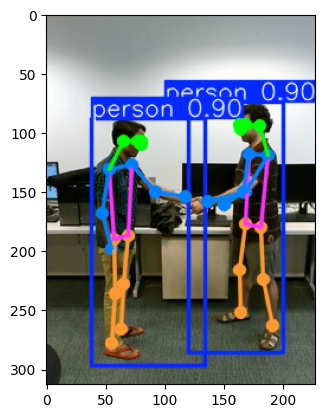

In [53]:
annotated_img = results.plot()
rgb_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

In [43]:
class Human:
    def __init__(self, box, keypoints):
        self.box = box
        self.keypoints = keypoints
        self.bounds = box.xyxy.numpy()[0].astype(int)
        self.top_left = self.bounds[:2]
        self.bottom_right = self.bounds[2:]

    def local(self, point):
        point = point.astype(int) - self.top_left
        return point

    def draw(self, img):
        sub_img = img[self.top_left[1]:self.bottom_right[1], self.top_left[0]:self.bottom_right[0]]
        for point in self.keypoints:
            point = self.local(point)
            cv2.circle(sub_img, tuple(point), 2, (0, 255, 0), -1)
        return sub_img

In [44]:
humans = []
for box, kpts in zip(boxes, keypoints):
    if class_names[box.cls.numpy()[0]] == 'person':
        humans.append(Human(box, kpts))

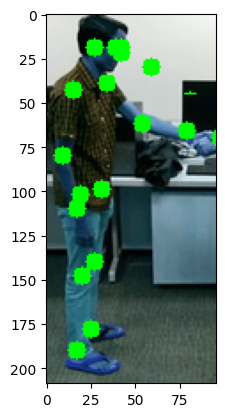

In [45]:
marked_img = humans[0].draw(img)
plt.imshow(marked_img)
plt.show()